In [3]:
#importing libararies
import numpy as np
import pandas as pd
import scipy.optimize as opt
import itertools as iter
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
#function that takes and return dataframes
def data_frames():

    """
    This function is to read in files in the Worldbank 
    format returning original and transposed 
    format. df_1 contains the orginal data frame, while the df_2 contains the transposed dataframe.

    """ 
    
    df_1 = pd.read_csv('urban_pop.csv')
    #df_2 = pd.read_csv('climate_change.csv', skiprows=3)
    df_2 = df_1.transpose()
    df_2.columns = df_2.iloc[0]
    return df_1, df_2.iloc[1:]

dataframe_1, dataframe_2 = data_frames()
display(dataframe_1)
display(dataframe_2)


,Time,Afghanistan [AFG],Albania [ALB],Algeria [DZA],American Samoa [ASM],Andorra [AND],Angola [AGO],Antigua and Barbuda [ATG],Argentina [ARG],Armenia [ARM],...,Post-demographic dividend [PST],Pre-demographic dividend [PRE],Small states [SST],South Asia [SAS],South Asia (IDA & IBRD) [TSA],Sub-Saharan Africa [SSF],Sub-Saharan Africa (excluding high income) [SSA],Sub-Saharan Africa (IDA & IBRD countries) [TSS],Upper middle income [UMC],World [WLD]
0,1961,796271,513592,3604615,13731,8768,597286,21474,15449953,1012433,...,487577589,26534457,4324552,98712866,98712866,34863263,34850947,34863263,328547379,1047559112
1,1962,839385,530766,3859410,14249,9760,628376,21461,15815495,1065430,...,497675284,27874369,4479748,101955679,101955679,36425228,36412110,36425228,341412387,1079414304
2,1963,885227,547928,4129215,14868,10808,660175,21443,16183088,1119589,...,507917690,29310847,4640819,105334005,105334005,38098808,38084859,38098808,356658729,1114226228
3,1964,934134,565248,4417036,15519,11913,691526,21449,16552518,1174561,...,518142873,30853532,4809663,108848887,108848887,39882265,39867446,39882265,372309492,1149870744
4,1965,986074,582374,4724528,16178,13062,721552,21490,16923099,1229978,...,528291087,32495997,4983117,112492479,112492479,41767940,41752207,41767940,383000434,1180824727
5,1966,1041191,599300,5011380,16825,14262,749546,21576,17295211,1285575,...,538044497,34179029,5158236,116277566,116277566,43721429,43704736,43721429,394362160,1212398058
6,1967,1099273,616687,5177789,17453,15495,776142,21690,17669090,1341282,...,547631388,35958303,5329666,120211107,120211107,45780417,45762724,45780417,405988971,1244509201
7,1968,1161355,635924,5351888,18075,16762,804151,21776,18048312,1397345,...,557047558,37878171,5507761,124302045,124302045,47957532,47938796,47957532,417909433,1277369632
8,1969,1228273,656733,5531039,18683,18079,837819,21764,18436398,1454168,...,566319340,39918828,5692482,128565805,128565805,50266034,50246216,50266034,430234994,1311109827
9,1970,1300949,677801,5713672,19258,19458,881021,21706,18836989,1511606,...,575483353,42045038,5883961,133019516,133019516,52658107,52637167,52658107,442880777,1345474754


Time,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Afghanistan [AFG],796271,839385,885227,934134,986074,1041191,1099273,1161355,1228273,1300949,...,2628555,2828169,3093388,3391712,3677087,3916250,4093837,4220821,4321585,4434762
Albania [ALB],513592,530766,547928,565248,582374,599300,616687,635924,656733,677801,...,1197222,1198912,1209490,1219882,1230218,1240399,1250518,1260414,1270214,1279853
Algeria [DZA],3604615,3859410,4129215,4417036,4724528,5011380,5177789,5351888,5531039,5713672,...,13416508,13958191,14502591,15044499,15579366,16103499,16615714,17115300,17606298,18103945
American Samoa [ASM],13731,14249,14868,15519,16178,16825,17453,18075,18683,19258,...,38330,39864,41312,42684,44016,45333,46643,47921,49139,50278
Andorra [AND],8768,9760,10808,11913,13062,14262,15495,16762,18079,19458,...,51626,53566,55540,57383,58846,59812,60131,59932,59603,59647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa [SSF],34863263,36425228,38098808,39882265,41767940,43721429,45780417,47957532,50266034,52658107,...,139406828,145817752,152384322,159086063,165682815,172359351,179183249,186236486,193441007,200883926
Sub-Saharan Africa (excluding high income) [SSA],34850947,36412110,38084859,39867446,41752207,43704736,45762724,47938796,50246216,52637167,...,139372582,145783021,152349392,159050345,165646065,172321975,179145225,186197903,193401536,200843530
Sub-Saharan Africa (IDA & IBRD countries) [TSS],34863263,36425228,38098808,39882265,41767940,43721429,45780417,47957532,50266034,52658107,...,139406828,145817752,152384322,159086063,165682815,172359351,179183249,186236486,193441007,200883926
Upper middle income [UMC],328547379,341412387,356658729,372309492,383000434,394362160,405988971,417909433,430234994,442880777,...,827389248,852007537,876286383,900643345,925361803,950229390,975360731,1000880315,1026692577,1052482087


In [63]:
#working on normalizing the data
def norm(dataframe):
    """ Returns the normalized dataframe"""

    min_val = np.min(dataframe)
    max_val = np.max(dataframe)
    
    scaled = (dataframe-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception of first (containing the time)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:8]:     # excluding the first columns
        df[col] = norm(df[col])
    return df

In [65]:
#read and normalize the data
df_world = norm_df(dataframe_1)
print(df_world.describe())
print(df_world)

              Time  Afghanistan [AFG]  Albania [ALB]  Algeria [DZA]  \
count    38.000000          38.000000      38.000000      38.000000   
mean   1980.157895           0.386320       0.527787       0.415130   
std      11.511513           0.290859       0.336055       0.308965   
min    1961.000000           0.000000       0.000000       0.000000   
25%    1970.250000           0.144100       0.221100       0.148656   
50%    1980.500000           0.374513       0.523613       0.343679   
75%    1989.750000           0.494950       0.882355       0.667445   
max    1999.000000           1.000000       1.000000       1.000000   

       American Samoa [ASM]  Andorra [AND]  Angola [AGO]  \
count             38.000000      38.000000     38.000000   
mean               0.406492       0.516941      0.314376   
std                0.310733       0.337866      0.306882   
min                0.000000       0.000000      0.000000   
25%                0.154985       0.215204      0.041833   


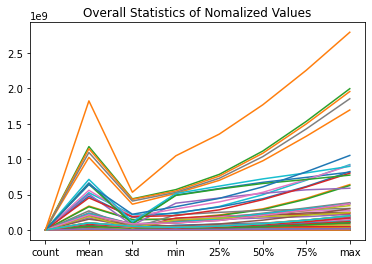

In [71]:
plt.plot(df_world.describe())
plt.title("Overall Statistics of Nomalized Values")
plt.show()

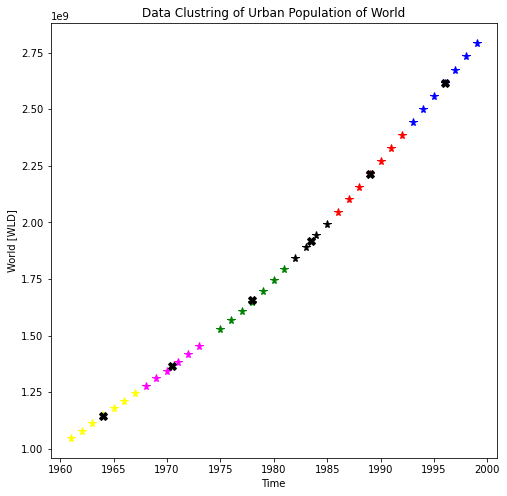

In [66]:
#clustring the data using the Aggolomorative Clustring method
ac = cluster.AgglomerativeClustering(n_clusters=6)

# taking the columns form original dataframe for fitting
df_fit = df_world[["World [WLD]","Time"]].copy()
df_fit = pd.DataFrame(df_fit)
df_fit = df_fit.fillna(0)
ac.fit(df_fit)

labels = ac.labels_

# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(6):
    xc = np.average(df_fit["Time"][labels==ic])
    yc = np.average(df_fit["World [WLD]"][labels==ic])
    xcen.append(xc)
    ycen.append(yc)

# plot using the labels to select colour
plt.figure(figsize=(8.0,8.0))

col = ["blue", "red", "green", "yellow", "black", "magenta"]
for l in range(0,6):     # loop over the different labels
    plt.plot(df_fit["Time"][labels==l], df_fit["World [WLD]"][labels==l], "*", markersize=8, color=col[l])
    
# show cluster centres
for ic in range(6):
    plt.plot(xcen[ic], ycen[ic], "Xk", markersize=8) 
    
plt.xlabel("Time")
plt.ylabel("World [WLD]")
plt.title("Data Clustring of Urban Population of World")
plt.show()

In [17]:
#now fitting the data using curve_fit and creating models
def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    f = scale * np.exp(growth * (t-1960)) 
    
    return f   

def logistics(t, scale, growth, t0):
    """ Computes logistics function with scale, growth raat
    and time of the turning point as free parameters
    """
    f = scale / (1.0 + np.exp(-growth * (t - t0)))
    
    return f

In [18]:
df_fit_2 = pd.DataFrame(dataframe_1)
df_fit_2 = df_fit_2.fillna(0)
popt, covar = opt.curve_fit(exp_growth, df_fit_2["Time"], df_fit_2["World [WLD]"])

Fit parameter [1.04333074e+09 2.56352484e-02]


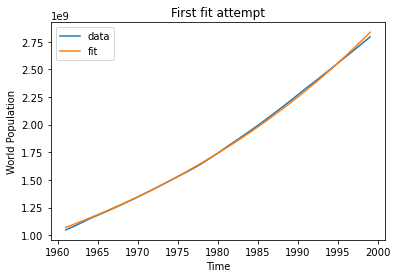

In [19]:
#plotting the result
print("Fit parameter", popt)

# use *popt to pass on the fit parameters
df_fit_2["pop_exp"] = exp_growth(df_fit_2["Time"], *popt)

plt.figure()
plt.plot(df_fit_2["Time"], df_fit_2["World [WLD]"], label="data")
plt.plot(df_fit_2["Time"], df_fit_2["pop_exp"], label="fit")

plt.legend()
plt.title("First fit attempt")
plt.xlabel("Time")
plt.ylabel("World Population")
plt.show()
print()

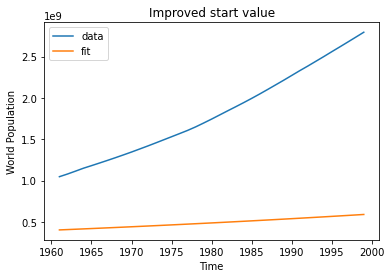

In [20]:
#improved value
popt = [4e8, 0.01]
df_fit_2["pop_exp"] = exp_growth(df_fit_2["Time"], *popt)

plt.figure()
plt.plot(df_fit_2["Time"], df_fit_2["World [WLD]"], label="data")
plt.plot(df_fit_2["Time"], df_fit_2["pop_exp"], label="fit")

plt.legend()
plt.xlabel("Time")
plt.ylabel("World Population")
plt.title("Improved start value")
plt.show()


Fit parameter [1.04333075e+09 2.56352481e-02]


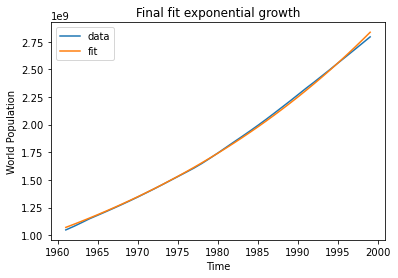

In [21]:
# Final fit exponential growth
popt, covar = opt.curve_fit(exp_growth, df_fit_2["Time"], 
                            df_fit_2["World [WLD]"], p0=[4e8, 0.02])
# much better
print("Fit parameter", popt)

df_fit_2["pop_exp"] = exp_growth(df_fit_2["Time"], *popt)

plt.figure()
plt.plot(df_fit_2["Time"], df_fit_2["World [WLD]"], label="data")
plt.plot(df_fit_2["Time"], df_fit_2["pop_exp"], label="fit")

plt.legend()
plt.xlabel("Time")
plt.ylabel("World Population")
plt.title("Final fit exponential growth")
plt.show()
print()

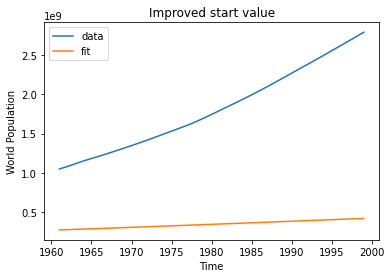

In [22]:
#calculate logistics function
popt = [8e8, 0.02, 1995]
df_fit_2["pop_log"] = logistics(df_fit_2["Time"], *popt)

plt.figure()
plt.plot(df_fit_2["Time"], df_fit_2["World [WLD]"], label="data")
plt.plot(df_fit_2["Time"], df_fit_2["pop_log"], label="fit")

plt.legend()
plt.xlabel("Time")
plt.ylabel("World Population")
plt.title("Improved start value")
plt.show()


Fit parameter [1.23024091e+10 3.03536842e-02 2.03912704e+03]


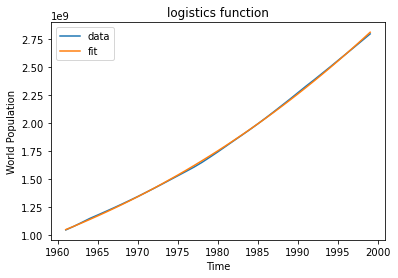

In [23]:
popt, covar = opt.curve_fit(logistics, df_fit_2["Time"], df_fit_2["World [WLD]"], 
                            p0=(2e9, 0.05, 1995.0))
print("Fit parameter", popt)
      
df_fit_2["pop_log"] = logistics(df_fit_2["Time"], *popt)

plt.figure()
plt.title("logistics function")
plt.plot(df_fit_2["Time"], df_fit_2["World [WLD]"], label="data")
plt.plot(df_fit_2["Time"], df_fit_2["pop_log"], label="fit")

plt.legend()
plt.xlabel("Time")
plt.ylabel("World Population")
plt.show()


In [24]:
#function to return upper and lower limit of error range
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or dataframe. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    """
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   


[1.09771678e+09 5.02383454e-04 4.42360748e+00]


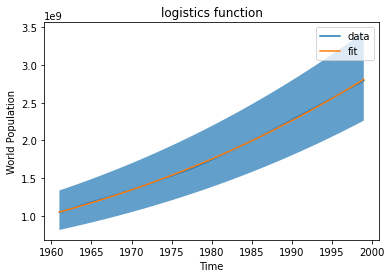

In [25]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(covar))
print(sigma)

low, up = err_ranges(df_fit_2["Time"], logistics, popt, sigma)

plt.figure()
plt.title("logistics function")
plt.plot(df_fit_2["Time"], df_fit_2["World [WLD]"], label="data")
plt.plot(df_fit_2["Time"], df_fit_2["pop_log"], label="fit")

plt.fill_between(df_fit_2["Time"], low, up, alpha=0.7)
plt.legend()
plt.xlabel("Time")
plt.ylabel("World Population")
plt.show()

In [26]:
#ranges
print("Forcasted population")
low, up = err_ranges(2030, logistics, popt, sigma)
print("2030 between ", low, "and", up)
low, up = err_ranges(2040, logistics, popt, sigma)
print("2040 between ", low, "and", up)
low, up = err_ranges(2050, logistics, popt, sigma)
print("2050 between ", low, "and", up)

Forcasted population
2030 between  4447890563.425846 and 6230477644.019409
2040 between  5295758946.517711 and 7246347311.116809
2050 between  6139972782.334173 and 8252535931.602232


In [27]:
#future predicted values
print("Forcasted population")
low, up = err_ranges(2030, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2030:", mean, "+/-", pm)

low, up = err_ranges(2040, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2040:", mean, "+/-", pm)

low, up = err_ranges(2050, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2050:", mean, "+/-", pm)

Forcasted population
2030: 5339184103.722628 +/- 891293540.2967815
2040: 6271053128.81726 +/- 975294182.2995491
2050: 7196254356.968203 +/- 1056281574.6340294
